In [1]:
pip install tensorflow

In [42]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
test_data='/content/drive/MyDrive/mitochondria/test/data'
test_label='/content/drive/MyDrive/mitochondria/test/label'
train_data='/content/drive/MyDrive/mitochondria/train/data'
train_label='/content/drive/MyDrive/mitochondria/train/label'

In [30]:
SIZE=256
image_db=[]
mask_db=[]

In [31]:
for image_name in [image_name for image_name in os.listdir(train_data) if image_name.endswith('.tif')]:
    image = cv2.imread(os.path.join(train_data, image_name), 0)
    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))
    image_db.append(np.array(image))


for image_name in [image_name for image_name in os.listdir(train_label) if image_name.endswith('.tif')]:
    image = cv2.imread(os.path.join(train_label, image_name), 0)
    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))
    mask_db.append(np.array(image))

In [32]:
print(image_db[0])
print(mask_db[0])

[[151 150 123 ... 133 110 128]
 [164 151 107 ... 107 102 151]
 [171 149 123 ...  94 111 169]
 ...
 [101  98  95 ... 145 140 157]
 [117 114 107 ... 144 164 178]
 [147 146 129 ... 120 154 163]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
#normalising the images
image_db = np.expand_dims(normalize(np.array(image_db), axis=1),3)
#D not normalize masks, just rescale to 0 to 1.
mask_db = np.expand_dims((np.array(mask_db)),3) /255.

In [34]:
#print(image_db[0])
#print(mask_db[0])

In [35]:
print(image_db.shape)
print(mask_db.shape)

(165, 256, 256, 1)
(165, 256, 256, 1)


In [65]:
image_db_test=[]
mask_db_test=[]

for image_name in [image_name for image_name in os.listdir(test_data) if image_name.endswith('.tif')]:
    image = cv2.imread(os.path.join(test_data, image_name), 0)
    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))
    image_db_test.append(np.array(image))


for image_name in [image_name for image_name in os.listdir(test_label) if image_name.endswith('.tif')]:
    image = cv2.imread(os.path.join(test_label, image_name), 0)
    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))
    mask_db_test.append(np.array(image))

In [60]:
print(image_db_test[0])
print(mask_db_test[0])

[[140 145 155 ... 105 104 127]
 [145 150 157 ... 100 106 105]
 [138 154 164 ... 131 143 119]
 ...
 [127 112  88 ... 176 178 184]
 [118 100  85 ... 183 180 181]
 [ 98  94 100 ... 184 186 185]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [61]:
#normalising the images
image_db_test = np.expand_dims(normalize(np.array(image_db), axis=1),3)
#D not normalize masks, just rescale to 0 to 1.
mask_db_test = np.expand_dims((np.array(mask_db)),3) /255.

In [62]:
print(image_db_test.shape)
print(mask_db_test.shape)

(165, 256, 256, 1, 1)
(165, 256, 256, 1, 1)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(image_db, mask_db, test_size = 0.10, random_state = 0)

In [45]:
print("Train set shapes:")
print("Images:", X_train.shape)
print("Masks:", y_train.shape)

print("\nTest set shapes:")
print("Images:", X_test.shape)
print("Masks:", y_test.shape)

Train set shapes:
Images: (148, 256, 256, 1)
Masks: (148, 256, 256, 1)

Test set shapes:
Images: (17, 256, 256, 1)
Masks: (17, 256, 256, 1)


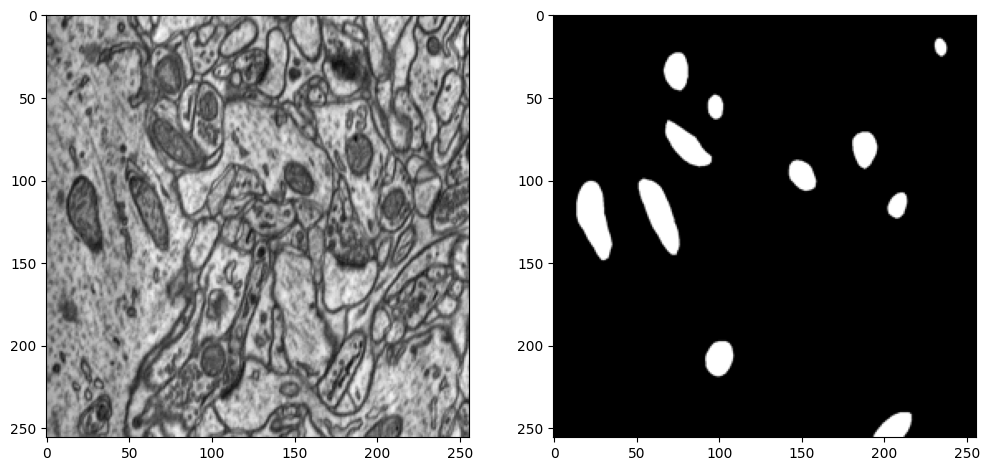

In [46]:
import random
import numpy as np

# Choose a random image number
image_number = random.choice(range(len(X_train)))

# Display the randomly chosen image and its corresponding mask
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()


In [ ]:
IMG_HEIGHT = image_db.shape[1]
IMG_WIDTH  = image_db.shape[2]
IMG_CHANNELS = image_db.shape[3]

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

# Define the U-Net model architecture
def unet(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottom
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)

    # Decoder
    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv5))
    merge6 = Concatenate(axis=3)([conv4, up6])
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = Concatenate(axis=3)([conv3, up7])
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = Concatenate(axis=3)([conv2, up8])
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = Concatenate(axis=3)([conv1, up9])
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)

    # Output
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    return model

# Create the U-Net model
model = unet(IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [50]:
history = model.fit(X_train, y_train,
                    batch_size = 16,
                    verbose=1,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    shuffle=False)

Epoch 1/20
10/10 [==============================] - 773s 76s/step - loss: 0.2184 - accuracy: 0.9337 - val_loss: 0.1999 - val_accuracy: 0.9392
Epoch 2/20
10/10 [==============================] - 755s 75s/step - loss: 0.2122 - accuracy: 0.9337 - val_loss: 0.1950 - val_accuracy: 0.9392
Epoch 3/20
10/10 [==============================] - 759s 76s/step - loss: 0.2062 - accuracy: 0.9337 - val_loss: 0.1847 - val_accuracy: 0.9392
Epoch 4/20
10/10 [==============================] - 752s 74s/step - loss: 0.1958 - accuracy: 0.9337 - val_loss: 0.1888 - val_accuracy: 0.9392
Epoch 5/20
10/10 [==============================] - 756s 75s/step - loss: 0.1869 - accuracy: 0.9337 - val_loss: 0.1492 - val_accuracy: 0.9392
Epoch 6/20
10/10 [==============================] - 738s 73s/step - loss: 0.1726 - accuracy: 0.9337 - val_loss: 0.1675 - val_accuracy: 0.9392
Epoch 7/20
10/10 [==============================] - 751s 75s/step - loss: 0.1701 - accuracy: 0.9337 - val_loss: 0.1440 - val_accuracy: 0.9392
Epoch 

In [51]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 256, 256, 64)         640       ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 64)         0         ['conv2d_2[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 128, 128, 128)        73856     ['max_pooling2d_1[0][0]'] 

In [ ]:
#image_db_test_1 = np.expand_dims(image_db_test, axis=-1)

In [71]:
mask_db_test_1 = np.array(mask_db_test)


In [75]:
mask_db_test_2 = np.expand_dims(mask_db_test_1, axis=-1)


In [76]:
print("Shape of image_db_test:", image_db_test_1.shape)
print("Shape of mask_db_test:", mask_db_test_2.shape)

Shape of image_db_test: (165, 256, 256, 1)
Shape of mask_db_test: (165, 256, 256, 1)


In [73]:
print("Data type of image_db_test_1:", image_db_test_1.dtype)
print("Data type of mask_db_test:", mask_db_test_1.dtype)

Data type of image_db_test_1: uint8
Data type of mask_db_test: uint8


In [77]:
# Assuming mask_db_test doesn't need reshaping

# Now, you can evaluate your model
loss, acc = model.evaluate(image_db_test_1, mask_db_test_2)
print("loss = ", loss)
print("Accuracy = ", (acc * 100.0), "%")

6/6 [==============================] - 240s 38s/step - loss: 249674.0625 - accuracy: 0.9375
loss =  249674.0625
Accuracy =  93.74897480010986 %


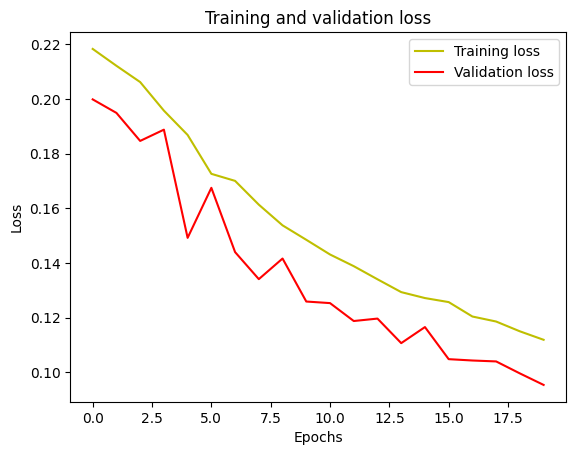

In [78]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.plot(history.epoch, loss, 'y', label='Training loss')
plt.plot(history.epoch, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

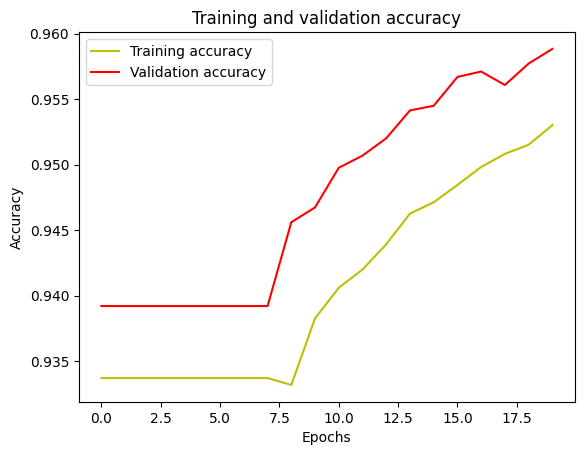

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy
plt.plot(history.epoch, acc, 'y', label='Training accuracy')
plt.plot(history.epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()